In [2]:
import numpy as np

In [2]:
x = np.array([[1,2], [3,4]])
x/2.0

array([[0.5, 1. ],
       [1.5, 2. ]])

In [3]:
a = np.array([[1,2], [3,4]])
b = np.array([10,20])

In [4]:
a*b

array([[10, 40],
       [30, 80]])

In [6]:
for row in a:
    print(row)

[1 2]
[3 4]


In [7]:
a.flatten()

array([1, 2, 3, 4])

In [14]:
a[0][1]

2

In [15]:
import matplotlib.pyplot as plt

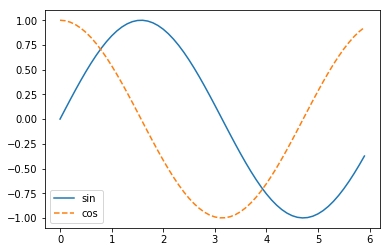

In [19]:
x = np.arange(0,6,0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1, label = 'sin')
plt.plot(x,y2, linestyle = "--", label = 'cos')
plt.legend()
plt.show()

In [20]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7
w*x

array([0. , 0.5])

In [21]:
np.sum(w*x) +b

-0.19999999999999996

# softmax

In [3]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [5]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [8]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [9]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [10]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 오버플로우 문제

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [11]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [12]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [14]:
a = np.array([0.3, 2.0, 4.0])
y = softmax(a) 
print(y) # y의 각 원소는 확률로 해석
np.sum(y)

[0.0213123  0.11666243 0.86202526]


1.0

In [20]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
# %load neuralnet_mnist.py
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_wight.pkl", "rb") as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], networl['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
	y = predict(network, x[i])
	p = np.argmax(y)
	if p == t[i]:
		accuracy_cnt += 1

print("Accuracy:" +str(float(accuracy_cnt) / len(x) ))